# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline
from itertools import product
import warnings
warnings.filterwarnings('ignore')

C:\Users\aab\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [2]:
# определяем исходы
Coin_1 = Coin_2 = ["Орел", 'Решка']

# задаем число экспериментов
n = 100000

# формируем выборку
A = pd.DataFrame({'Coin_1': random.choices(Coin_1, k = n)
                  ,'Coin_2': random.choices(Coin_2, k = n)})

# считаем статистику 
P_different = len(A[A['Coin_1'] != A['Coin_2']]) / A.shape[0]
print(f'Вероятность того, что монеты выпали разными сторонами: {P_different}')

Вероятность того, что монеты выпали разными сторонами: 0.50003


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [3]:
# определяем исходы
Coin_1 = Coin_2 = Coin_3 = ["Орел", 'Решка']
# для простоты расчетов применим исходы в виде чисел
C_1 = C_2 = C_3 = [1, 0]

# находим множество всех элементарных событий
print(f'Множество всех элементарных событий:\n')
for c1, c2, c3 in product(Coin_1, Coin_2, Coin_3):
    print(c1, c2, c3)
    
print('\n')
print(f'Вероятность выпадения всех орлов: {1/8}')  
print(f'Вероятность выпадения одного орла и двух решек: {3/8}')  
print(f'Вероятность выпадения одной решки и двух орлов: {3/8}')  
print(f'Вероятность выпадения всех решек: {1/8}')  
print('\n')

# задаем число экспериментов
n = 100000

# формируем выборку
A = pd.DataFrame({'Coin_1': random.choices(C_1, k = n)
                  ,'Coin_2': random.choices(C_2, k = n)
                  ,'Coin_3': random.choices(C_3, k = n)})

# считаем статистику 
# не выпало ни одного герба
x = A.sum(axis = 1)
print(f'Эмпирическая вероятность события "не выпало ни одного герба": {len(x[x == 0]) / len(x)}')

# выпало четное число гербов
print(f'Эмпирическая вероятность события "выпало четное число гербов": {len(x[x == 0] | x[x == 2]) / len(x)}')

# на третьей монете выпал герб
print(f'Эмпирическая вероятность события "на третьей монете выпал герб": {A["Coin_3"].sum() / A.shape[0]}')



Множество всех элементарных событий:

Орел Орел Орел
Орел Орел Решка
Орел Решка Орел
Орел Решка Решка
Решка Орел Орел
Решка Орел Решка
Решка Решка Орел
Решка Решка Решка


Вероятность выпадения всех орлов: 0.125
Вероятность выпадения одного орла и двух решек: 0.375
Вероятность выпадения одной решки и двух орлов: 0.375
Вероятность выпадения всех решек: 0.125


Эмпирическая вероятность события "не выпало ни одного герба": 0.12472
Эмпирическая вероятность события "выпало четное число гербов": 0.50312
Эмпирическая вероятность события "на третьей монете выпал герб": 0.50163


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [4]:
# определяем исходы: Е - выбран претендент Е, L - выбран претендент L, 0 - оба забракованы
C1 = C2 = C3 = ['E', 'L', '0']

# образуем матрицу исходов и посчитаем количество голосов за кандидатов
df = pd.DataFrame(product(C2, C2, C3), columns = ['C1', 'C2', 'C3'])

def count(df):
    df['E_votes'] = np.sum(df == 'E')
    df['L_votes'] = np.sum(df == 'L')
    return df

df = df.apply(count, axis = 1)

# рекомендован кандидат L
print(f'Вероятность события "рекомендован кандидат L": {round(df[df["L_votes"] > 1].shape[0] / df.shape[0], 5)}')

# рекомендован кандидат L
print(f'Вероятность события "рекомендован кандидат Е": {round(df[df["E_votes"] > 1].shape[0] / df.shape[0], 5)}')


Вероятность события "рекомендован кандидат L": 0.25926
Вероятность события "рекомендован кандидат Е": 0.25926


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [19]:
# определяем исходы: 
Dice_1 = Dice_2 = list(range(1, 7))

# множество элементарных событий можно описать двумя способами, зависящими от постановки задачи:
# 1) элементарное событие - сумма выпавших значений, например "1" + "4" = "5"
# 2) элементарное событие - отдельные выпавшие значения "выпали значения 1 и 4"
print(f'Множество всех элементарных событий:\n')
for c1, c2 in product(Dice_1, Dice_2):
    print((c1, c2), end = '  ')
    
df = pd.DataFrame(product(Dice_1, Dice_2), columns = ['Dice_1', 'Dice_2'])    
df['Total'] = df['Dice_1'] + df['Dice_2']

# вышло две "шестерки"
print(f'\n\nВероятность события "вышло две "шестерки"": {round(df[(df["Dice_1"] == 6) & (df["Dice_2"] == 6)].shape[0] / df.shape[0], 5)}')

# сумма выпавших очков не меньше 11
print(f'\nВероятность события "сумма выпавших очков не меньше 11": {round(df[df["Total"] >= 11].shape[0] / df.shape[0], 5)}')

# не выпала ни одна "шестерка"
print(f'\nВероятность события "не выпала ни одна "шестерка"": {round(df[(df["Dice_1"] != 6) & (df["Dice_2"] != 6)].shape[0] / df.shape[0], 5)}')


Множество всех элементарных событий:

(1, 1)  (1, 2)  (1, 3)  (1, 4)  (1, 5)  (1, 6)  (2, 1)  (2, 2)  (2, 3)  (2, 4)  (2, 5)  (2, 6)  (3, 1)  (3, 2)  (3, 3)  (3, 4)  (3, 5)  (3, 6)  (4, 1)  (4, 2)  (4, 3)  (4, 4)  (4, 5)  (4, 6)  (5, 1)  (5, 2)  (5, 3)  (5, 4)  (5, 5)  (5, 6)  (6, 1)  (6, 2)  (6, 3)  (6, 4)  (6, 5)  (6, 6)  

Вероятность события "вышло две "шестерки"": 0.02778

Вероятность события "сумма выпавших очков не меньше 11": 0.08333

Вероятность события "не выпала ни одна "шестерка"": 0.69444


In [1]:
# способ генерации комбинаций без повторов
# from itertools import combinations_with_replacement
# dice = list(range(1, 7))
# print(list(combinations_with_replacement(dice, 2)))

## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [20]:
# определяем исходы: 
Dice_1 = Dice_2 = list(range(1, 7))

df = pd.DataFrame(product(Dice_1, Dice_2), columns = ['Dice_1', 'Dice_2'])    
df['Total'] = df['Dice_1'] + df['Dice_2']

# выпала хотя бы одна шестёрка
print(f'\n\nВероятность события "выпала хотя бы одна шестёрка": {round(df[(df["Dice_1"] == 6) | (df["Dice_2"] == 6)].shape[0] / df.shape[0], 5)}')




Вероятность события "выпала хотя бы одна шестёрка": 0.30556


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [37]:
# определяем исходы: 
Number_1 = Number_2 = Number_3 = list(range(0, 10))

df = pd.DataFrame(product(Number_1, Number_2, Number_3), columns = ['Number_1', 'Number_2', 'Number_3'])    

# Стерлись различные цифры
print(f'''\nВероятность события "Стерлись различные цифры": 
    {round(df[(df["Number_1"] != df["Number_2"]) & (df["Number_1"] != df["Number_3"]) & (df["Number_2"] != df["Number_3"])]
        .shape[0] / df.shape[0], 5)}''')

# Стерлись одинаковые цифры
print(f'''\nВероятность события "Стерлись одинаковые цифры": 
    {round(df[(df["Number_1"] == df["Number_2"]) & (df["Number_1"] == df["Number_3"]) & (df["Number_2"] == df["Number_3"])]
        .shape[0] / df.shape[0], 5)}''')

# Среди стершихся цифр хотя бы две совпадают
print(f'''\nВероятность события "Среди стершихся цифр хотя бы две совпадают": 
    {round(df[(df["Number_1"] == df["Number_2"]) | (df["Number_1"] == df["Number_3"]) | (df["Number_2"] == df["Number_3"])]
        .shape[0] / df.shape[0], 5)}''')

# Среди стершихся цифр хотя бы две различны
print(f'''\nВероятность события "Среди стершихся цифр хотя бы две различны": 
    {round(df[(df["Number_1"] != df["Number_2"]) | (df["Number_1"] != df["Number_3"]) | (df["Number_2"] != df["Number_3"])]
        .shape[0] / df.shape[0], 5)}''')


Вероятность события "Стерлись различные цифры": 
    0.72

Вероятность события "Стерлись одинаковые цифры": 
    0.01

Вероятность события "Среди стершихся цифр хотя бы две совпадают": 
    0.28

Вероятность события "Среди стершихся цифр хотя бы две различны": 
    0.99


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

In [18]:
# случайная величина определяется распределением Бернулли
# вероятность успеха = 0.1
bernoulli_rv = sts.bernoulli(0.1) 

x = bernoulli_rv.rvs(10)

# учтем затраты на покупку билета
result = [-1 if i == 0 else 9 for i in x]
print(f'Выборка случайной величины: {result}')

Выборка случайной величины: [-1, -1, 9, -1, -1, -1, -1, -1, -1, -1]


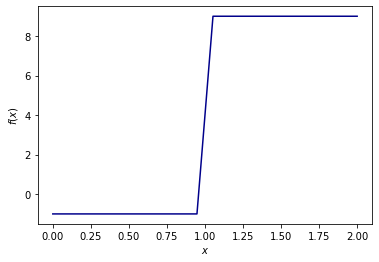

In [31]:
x = np.linspace(0, 2, 20)
cdf = bernoulli_rv.cdf(x) # массив из значений функции распределения
ccdf = [-1 if i == 0.9 else 9 for i in cdf] # корректировка на величину выигрыша
plt.plot(x, ccdf, color = "darkblue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot();

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

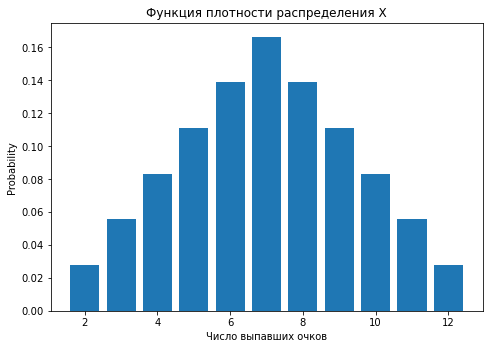

Вероятность получить не более 4 очков при броске двух кубиков: 0.16667
Вероятность получить более 4 очков при броске двух кубиков: 0.83334


In [45]:
# определяем исходы: 
Dice_1 = Dice_2 = list(range(1, 7))

# случайная величина Х - сумма выпавших значений

df = pd.DataFrame(product(Dice_1, Dice_2), columns = ['Dice_1', 'Dice_2'])    
df['Total'] = df['Dice_1'] + df['Dice_2']

# группировка возможных исходов

df2 = df.groupby(['Total'])['Total'].count().to_frame()
df2.rename(columns = {'Total' : 'Quantity'}, inplace = True)
df2.reset_index(inplace = True)
df2.rename(columns = {'Total' : 'Points'}, inplace = True)
df2['P'] = round(df2['Quantity'] / df.shape[0], 5)

# график функции плотности распределения Х
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df2['Points'],df2['P'])
ax.set_ylabel('Probability')
ax.set_xlabel('Число выпавших очков')
ax.set_title('Функция плотности распределения Х')
plt.show()

print(f'Вероятность получить не более 4 очков при броске двух кубиков: {round(df2["P"][df2["Points"] <= 4].sum(), 5)}')
print(f'Вероятность получить более 4 очков при броске двух кубиков: {round(df2["P"][df2["Points"] > 4].sum(), 5)}')

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [68]:
# сформируем массив карт
Card = ['6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
Suit = ['Clubs', 'Diamonds', 'Hearts', 'Spades']

Deck = [i + j for i, j in product(Card, Suit)]

# задаем число экспериментов
n = 100000
# формируем выборку
card_1 = []
card_2 = []
for i in range(n):
    card_1.append(''.join(random.choices(Deck)))
    card_2.append(''.join(random.choices([j for j in Deck if j != card_1[i]])))  

A = pd.DataFrame({'Card_1': card_1, 'Card_2': card_2})
#A[A['Card_1'] == A['Card_2']].shape


# вероятность того, что первой картой была шестерка, а второй — семерка
print(f'''\nВероятность события "первая карта - шестерка, вторая — семерка":
   {round(A[(A["Card_1"].str[0] == "6") & (A["Card_2"].str[0] == "7")].shape[0] / A.shape[0], 5)}''')

# вероятность того, что первой картой была шестерка бубен, а второй — семерка бубен
print(f'''\nВероятность события "первая карта - шестерка бубен, вторая — семерка бубен":
   {round(A[(A["Card_1"] == "6Diamonds") & (A["Card_2"] == "7Diamonds")].shape[0] / A.shape[0], 5)}''')


Вероятность события "первая карта - шестерка, вторая — семерка":
   0.01279

Вероятность события "первая карта - шестерка бубен, вторая — семерка бубен":
   0.00072


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [75]:
# заполняем урну 
Urn = ['white'] * 2 + ['black'] * 3

# задаем число экспериментов
n = 100000

# формируем выборку
orb_1 = []
orb_2 = []
for i in range(n):
    orb_1.append(''.join(random.choices(Urn)))
    if orb_1[i] == 'black':
        Changed_Urn = ['white'] * 3 + ['black'] * 2
    else:
        Changed_Urn = ['white'] + ['black'] * 3
    orb_2.append(''.join(random.choices(Changed_Urn)))  

A = pd.DataFrame({'Orb_1': orb_1, 'Orb_2': orb_2})

# вероятность того, что извлечены два белых шара
print(f'''\nВероятность события "извлечены два белых шара":
   {round(A[(A["Orb_1"] == "white") & (A["Orb_2"] == "white")].shape[0] / A.shape[0], 5)}''')

# вероятность того, что извлечены два черных шара
print(f'''\nВероятность события "извлечены два черных шара":
   {round(A[(A["Orb_1"] == "black") & (A["Orb_2"] == "black")].shape[0] / A.shape[0], 5)}''')


Вероятность события "извлечены два белых шара":
   0.09919

Вероятность события "извлечены два черных шара":
   0.23918
